<a href="https://colab.research.google.com/github/MaitreePimple/Data-Science/blob/main/Data%20Science%20Core%20Pt2(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8')

Step 1 — Understanding the Problem & Dataset

---
we’ll create a dummy dataset simulating customer data


In [3]:
data = {
    'Age' : [25, 32, np.nan, 40, 29, 50, 23, np.nan],
    'Gender':['Male', 'Female', 'Female', 'Male', np.nan, 'Female', 'Male', 'Male'],
    'Income': [40000, 52000, 60000, np.nan, 48000, 75000, 30000, 45000],
    'Purchased':['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(data)
df

,Age,Gender,Income,Purchased
0,25.0,Male,40000.0,Yes
1,32.0,Female,52000.0,No
2,NaN,Female,60000.0,Yes
3,40.0,Male,NaN,No
4,29.0,NaN,48000.0,Yes
5,50.0,Female,75000.0,Yes
6,23.0,Male,30000.0,No
7,NaN,Male,45000.0,Yes


Step 2 — Importing & Inspecting Data

In [4]:
df.head() #View first few rows

,Age,Gender,Income,Purchased
0,25.0,Male,40000.0,Yes
1,32.0,Female,52000.0,No
2,NaN,Female,60000.0,Yes
3,40.0,Male,NaN,No
4,29.0,NaN,48000.0,Yes


In [5]:
df.shape #Dataset shape

(8, 4)

In [6]:
df.info() #Info: data types + missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        6 non-null      float64
 1   Gender     7 non-null      object 
 2   Income     7 non-null      float64
 3   Purchased  8 non-null      object 
dtypes: float64(2), object(2)
memory usage: 388.0+ bytes


In [7]:
df.describe() #Summary statistics

,Age,Income
count,6.000000,7.000000
mean,33.166667,50000.000000
std,10.186592,14479.871086
min,23.000000,30000.000000
25%,26.000000,42500.000000
50%,30.500000,48000.000000
75%,38.000000,56000.000000
max,50.000000,75000.000000


In [8]:
df.isnull().sum() #Check missing values

,0
Age,2
Gender,1
Income,1
Purchased,0


Step 3 — Handling Missing Data

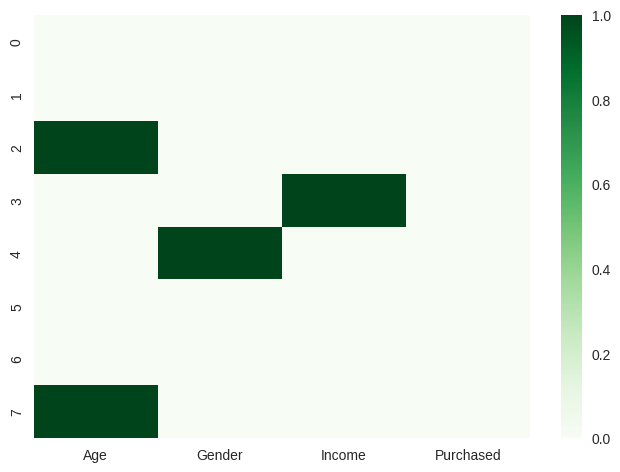

In [18]:
#Visualize missing values
sns.heatmap(df.isnull(), cmap="Greens")
plt.show()

Option 1: Remove rows with missing values

Option 2: Impute missing values







In [19]:
#Option 1: Remove rows with missing values
#df_drop = df.dropna()
#df_drop

In [21]:
#Option 2: Impute missing values
#Numerical → mean or median
#Categorical → mode
df['Age'].fillna(df['Age'].median(),inplace = True)
df['Income'].fillna(df['Income'].mean(), inplace = True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipython-input-2519266994.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace = True)
/tmp/ipython-input-2519266994.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
Age,0
Gender,0
Income,0
Purchased,0


Step 4 — Explore Data Characteristics

In [23]:
#Summary statistics
df.describe(include='all')

,Age,Gender,Income,Purchased
count,8.00000,8,8.000000,8
unique,NaN,2,NaN,2
top,NaN,Male,NaN,Yes
freq,NaN,5,NaN,5
mean,32.50000,NaN,50000.000000,NaN
std,8.69729,NaN,13405.755694,NaN
min,23.00000,NaN,30000.000000,NaN
25%,28.00000,NaN,43750.000000,NaN
50%,30.50000,NaN,49000.000000,NaN
75%,34.00000,NaN,54000.000000,NaN


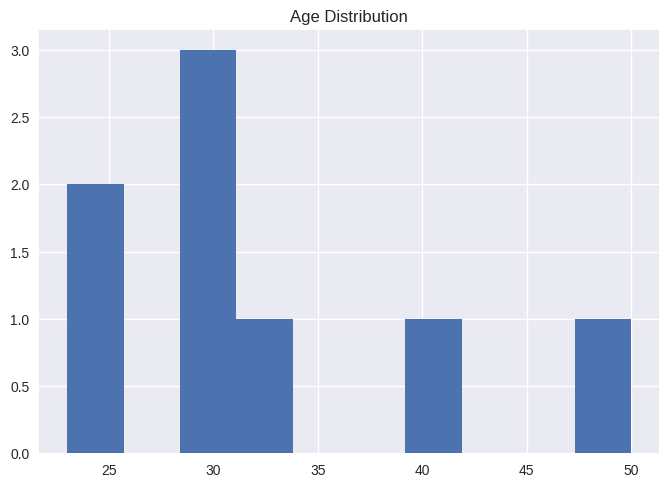

In [25]:
#Distribution of numerical variables
df['Age'].hist()
plt.title("Age Distribution")
plt.show()

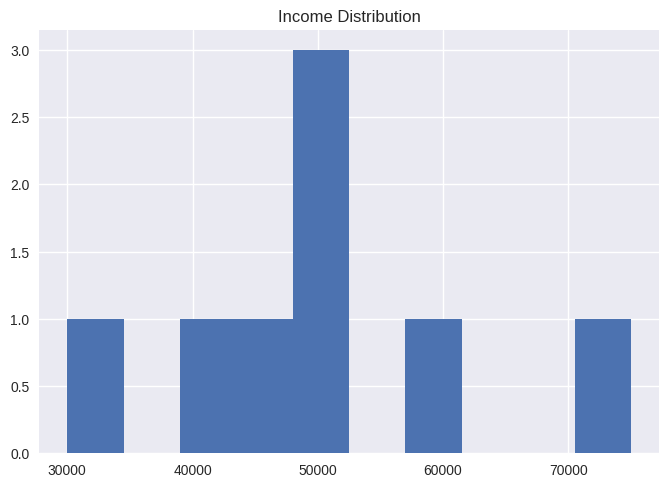

In [26]:
df['Income'].hist()
plt.title("Income Distribution")
plt.show()

Step 5 — Data Transformation

In [27]:
# Encoding categorical variables
#One-hot encoding:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Age,Income,Gender_Male,Purchased_Yes
0,25.0,40000.0,True,True
1,32.0,52000.0,False,False
2,30.5,60000.0,False,True
3,40.0,50000.0,True,False
4,29.0,48000.0,True,True
5,50.0,75000.0,False,True
6,23.0,30000.0,True,False
7,30.5,45000.0,True,True


In [29]:
#Scaling numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded [['Age','Income']] = scaler.fit_transform(df_encoded[['Age','Income']])
df_encoded

,Age,Income,Gender_Male,Purchased_Yes
0,-0.921878,-0.797452,True,True
1,-0.061459,0.159490,False,False
2,-0.245834,0.797452,False,True
3,0.921878,0.000000,True,False
4,-0.430210,-0.159490,True,True
5,2.151048,1.993631,False,True
6,-1.167712,-1.594904,True,False
7,-0.245834,-0.398726,True,True


Step 6 — Visualizing Relationship


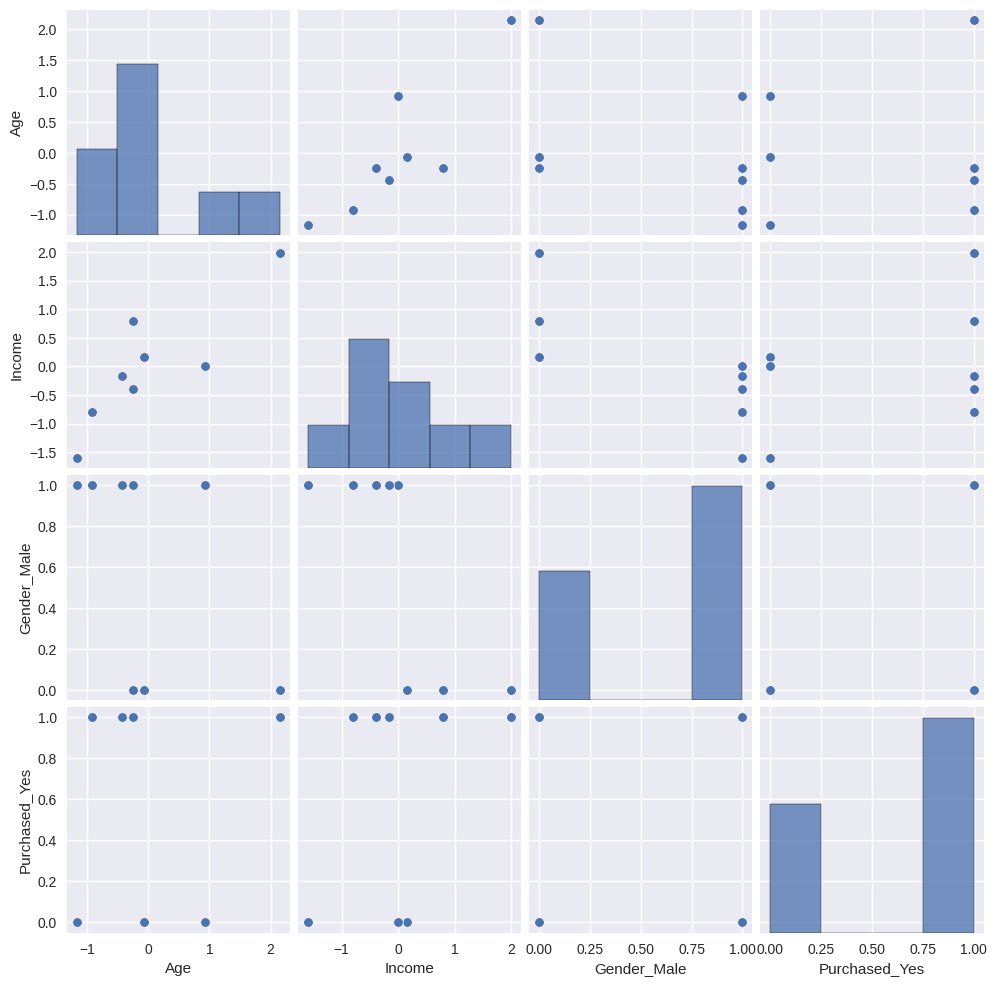

In [30]:
#Pairplot
sns.pairplot(df_encoded)
plt.show()

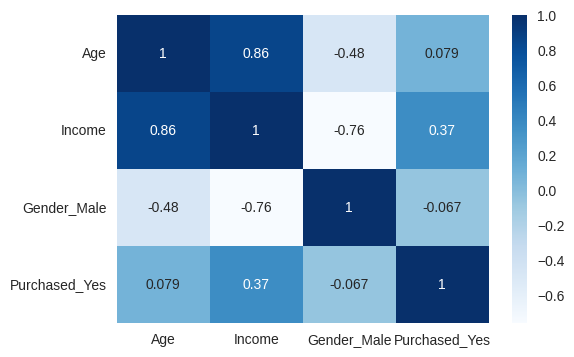

In [32]:
#Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_encoded.corr(), annot= True,cmap="Blues")
plt.show()

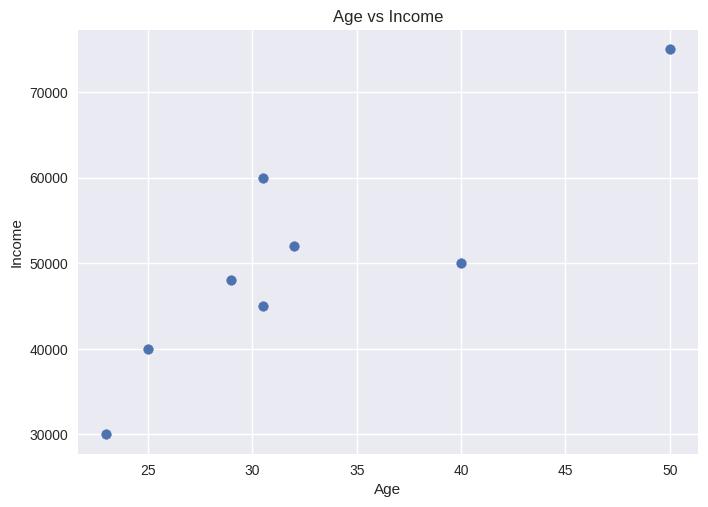

In [33]:
#Scatter plot
plt.scatter(df['Age'],df['Income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()


Step 7 — Handling Outliers

---

Use IQR method for numerical columns.

In [34]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 -1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df[(df['Income'] < lower) | (df['Income'] > upper)]
outliers

,Age,Gender,Income,Purchased
5,50.0,Female,75000.0,Yes


In [36]:
#Remove outliers
df_no_outliers = df[(df['Income'] >= lower) & (df['Income'] <= upper)]
df_no_outliers


,Age,Gender,Income,Purchased
0,25.0,Male,40000.0,Yes
1,32.0,Female,52000.0,No
2,30.5,Female,60000.0,Yes
3,40.0,Male,50000.0,No
4,29.0,Male,48000.0,Yes
6,23.0,Male,30000.0,No
7,30.5,Male,45000.0,Yes


Step 8 — Communicating Findings


Summary of EDA Findings

1. Data contains 8 rows and 4 columns.
2. There were missing values in:

Age

Income

Gender
They were imputed using median, mean & mode.

3. Income distribution had mild right skewness.
4. Age and Income show a weak positive correlation.
5. One outlier was detected in the Income variable.
6. After cleaning, dataset is ready for modeling.